In [1]:
pip install spectral

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import spectral as sp
import numpy as np
import matplotlib.pyplot as plt
#Load the hyperspectral image
hdr_path = 'F:/anh/Hyper-Spectral/hyper_20220326_3cm.hdr'
data_dir = 'F:/anh/Hyper-Spectral/hyper_20220326_3cm.img'
os.environ['SPECTRAL_DATA'] = data_dir

img = sp.open_image(hdr_path) 

In [3]:
#The image contains 122 bands with shape of (8609, 8029)
img.shape

(8609, 8029, 122)

In [4]:
from PIL import Image
import numpy as np
#Load the groundtruth label of the hyperspectral image
image = Image.open('F:/anh/dataset/label.png')
image_array = np.array(image)

print(image_array.shape)


(8609, 8029)


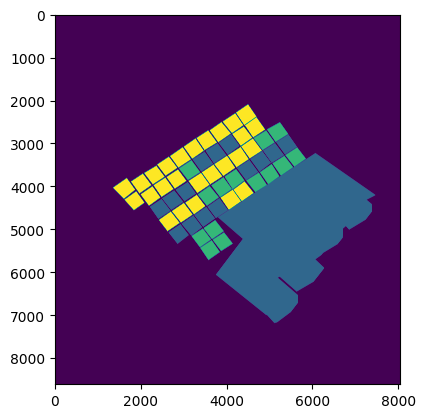

In [5]:
'''The label created
Yellow - Lack of P
Blue - Enough P
Green - Excess P'''
plt.imshow(image_array)

In [6]:
from sklearn.decomposition import PCA

In [7]:
def applyPCA(X, numComponents=75):
    newX = np.reshape(X, (-1, X.shape[2]))
    pca = PCA(n_components=numComponents, whiten=True)
    newX = pca.fit_transform(newX)
    newX = np.reshape(newX, (X.shape[0],X.shape[1], numComponents))
    return newX, pca

In [8]:
def crop_and_stack_bands(img, crop_size=144, start_x=None, start_y=None):
    # Get the number of bands
    num_bands = img.shape[2]

    # Initialize an empty list to store the cropped bands
    cropped_bands_list = []

    # Loop through each band
    for band in range(num_bands):
        # Read the current band
        current_band = img.read_band(band)  # Bands in Spectral start from 1

        # Set default starting points if not provided
        if start_x is None:
            start_x = current_band.shape[0] // 2 - crop_size // 2
        if start_y is None:
            start_y = current_band.shape[1] // 2 - crop_size // 2

        # Calculate the cropping boundaries
        end_x = start_x + crop_size
        end_y = start_y + crop_size

        # Crop the band
        cropped_band = current_band[start_x:end_x, start_y:end_y]

        # Append the cropped band to the list
        cropped_bands_list.append(cropped_band)

    # Convert the list of cropped bands to a NumPy array
    cropped_bands = np.stack(cropped_bands_list, axis=-1)
    cropped_bands, pca = applyPCA(cropped_bands,numComponents=30)
    return cropped_bands

In [30]:
'''Example: Customize start_x and start_y
In this example I cut the image vertically from a selected x position of the image (like 28 below and stop at the nearest postion compare with the edges) to get the data for training
The reason is that the image is too large, and cropping of reshaping might eliminate some important information of the image so cutting the original image into 144x144(size of the input of the model)
is preferable.
'''

for i in range(28,59): 
  for j in range(55):
    custom_start_x = 144*i
    custom_start_y = 144*j

    cropped_array = crop_and_stack_bands(img, start_x=custom_start_x, start_y=custom_start_y)
    np.save(f'F:/144array/array_x={144*i}_y={144*j}.npy', cropped_array)
    print(f"Shape of array_x={144*i}_y={144*j}.npy:", cropped_array.shape)

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4032_y=0.npy: (144, 144, 30)
Shape of array_x=4032_y=144.npy: (144, 144, 30)
Shape of array_x=4032_y=288.npy: (144, 144, 30)
Shape of array_x=4032_y=432.npy: (144, 144, 30)
Shape of array_x=4032_y=576.npy: (144, 144, 30)
Shape of array_x=4032_y=720.npy: (144, 144, 30)
Shape of array_x=4032_y=864.npy: (144, 144, 30)
Shape of array_x=4032_y=1008.npy: (144, 144, 30)
Shape of array_x=4032_y=1152.npy: (144, 144, 30)
Shape of array_x=4032_y=1296.npy: (144, 144, 30)
Shape of array_x=4032_y=1440.npy: (144, 144, 30)
Shape of array_x=4032_y=1584.npy: (144, 144, 30)
Shape of array_x=4032_y=1728.npy: (144, 144, 30)
Shape of array_x=4032_y=1872.npy: (144, 144, 30)
Shape of array_x=4032_y=2016.npy: (144, 144, 30)
Shape of array_x=4032_y=2160.npy: (144, 144, 30)
Shape of array_x=4032_y=2304.npy: (144, 144, 30)
Shape of array_x=4032_y=2448.npy: (144, 144, 30)
Shape of array_x=4032_y=2592.npy: (144, 144, 30)
Shape of array_x=4032_y=2736.npy: (144, 144, 30)
Shape of array_x=4032_y=2880.

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4176_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4176_y=7776.npy: (144, 144, 30)
Shape of array_x=4320_y=0.npy: (144, 144, 30)
Shape of array_x=4320_y=144.npy: (144, 144, 30)
Shape of array_x=4320_y=288.npy: (144, 144, 30)
Shape of array_x=4320_y=432.npy: (144, 144, 30)
Shape of array_x=4320_y=576.npy: (144, 144, 30)
Shape of array_x=4320_y=720.npy: (144, 144, 30)
Shape of array_x=4320_y=864.npy: (144, 144, 30)
Shape of array_x=4320_y=1008.npy: (144, 144, 30)
Shape of array_x=4320_y=1152.npy: (144, 144, 30)
Shape of array_x=4320_y=1296.npy: (144, 144, 30)
Shape of array_x=4320_y=1440.npy: (144, 144, 30)
Shape of array_x=4320_y=1584.npy: (144, 144, 30)
Shape of array_x=4320_y=1728.npy: (144, 144, 30)
Shape of array_x=4320_y=1872.npy: (144, 144, 30)
Shape of array_x=4320_y=2016.npy: (144, 144, 30)
Shape of array_x=4320_y=2160.npy: (144, 144, 30)
Shape of array_x=4320_y=2304.npy: (144, 144, 30)
Shape of array_x=4320_y=2448.npy: (144, 144, 30)
Shape of array_x=4320_y=2592.npy: (144, 144, 30)
Shape of array_x=4320_y=2736.

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4320_y=7488.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4320_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4320_y=7776.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4464_y=0.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4464_y=144.npy: (144, 144, 30)
Shape of array_x=4464_y=288.npy: (144, 144, 30)
Shape of array_x=4464_y=432.npy: (144, 144, 30)
Shape of array_x=4464_y=576.npy: (144, 144, 30)
Shape of array_x=4464_y=720.npy: (144, 144, 30)
Shape of array_x=4464_y=864.npy: (144, 144, 30)
Shape of array_x=4464_y=1008.npy: (144, 144, 30)
Shape of array_x=4464_y=1152.npy: (144, 144, 30)
Shape of array_x=4464_y=1296.npy: (144, 144, 30)
Shape of array_x=4464_y=1440.npy: (144, 144, 30)
Shape of array_x=4464_y=1584.npy: (144, 144, 30)
Shape of array_x=4464_y=1728.npy: (144, 144, 30)
Shape of array_x=4464_y=1872.npy: (144, 144, 30)
Shape of array_x=4464_y=2016.npy: (144, 144, 30)
Shape of array_x=4464_y=2160.npy: (144, 144, 30)
Shape of array_x=4464_y=2304.npy: (144, 144, 30)
Shape of array_x=4464_y=2448.npy: (144, 144, 30)
Shape of array_x=4464_y=2592.npy: (144, 144, 30)
Shape of array_x=4464_y=2736.npy: (144, 144, 30)
Shape of array_x=4464_y=2880.npy: (144, 144, 30)
Shape of array_x=4464_y=30

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4464_y=7488.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4464_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4464_y=7776.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4608_y=0.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4608_y=144.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4608_y=288.npy: (144, 144, 30)
Shape of array_x=4608_y=432.npy: (144, 144, 30)
Shape of array_x=4608_y=576.npy: (144, 144, 30)
Shape of array_x=4608_y=720.npy: (144, 144, 30)
Shape of array_x=4608_y=864.npy: (144, 144, 30)
Shape of array_x=4608_y=1008.npy: (144, 144, 30)
Shape of array_x=4608_y=1152.npy: (144, 144, 30)
Shape of array_x=4608_y=1296.npy: (144, 144, 30)
Shape of array_x=4608_y=1440.npy: (144, 144, 30)
Shape of array_x=4608_y=1584.npy: (144, 144, 30)
Shape of array_x=4608_y=1728.npy: (144, 144, 30)
Shape of array_x=4608_y=1872.npy: (144, 144, 30)
Shape of array_x=4608_y=2016.npy: (144, 144, 30)
Shape of array_x=4608_y=2160.npy: (144, 144, 30)
Shape of array_x=4608_y=2304.npy: (144, 144, 30)
Shape of array_x=4608_y=2448.npy: (144, 144, 30)
Shape of array_x=4608_y=2592.npy: (144, 144, 30)
Shape of array_x=4608_y=2736.npy: (144, 144, 30)
Shape of array_x=4608_y=2880.npy: (144, 144, 30)
Shape of array_x=4608_y=3024.npy: (144, 144, 30)
Shape of array_x=4608_y=3

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4608_y=7488.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4608_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4608_y=7776.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4752_y=0.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4752_y=144.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4752_y=288.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4752_y=432.npy: (144, 144, 30)
Shape of array_x=4752_y=576.npy: (144, 144, 30)
Shape of array_x=4752_y=720.npy: (144, 144, 30)
Shape of array_x=4752_y=864.npy: (144, 144, 30)
Shape of array_x=4752_y=1008.npy: (144, 144, 30)
Shape of array_x=4752_y=1152.npy: (144, 144, 30)
Shape of array_x=4752_y=1296.npy: (144, 144, 30)
Shape of array_x=4752_y=1440.npy: (144, 144, 30)
Shape of array_x=4752_y=1584.npy: (144, 144, 30)
Shape of array_x=4752_y=1728.npy: (144, 144, 30)
Shape of array_x=4752_y=1872.npy: (144, 144, 30)
Shape of array_x=4752_y=2016.npy: (144, 144, 30)
Shape of array_x=4752_y=2160.npy: (144, 144, 30)
Shape of array_x=4752_y=2304.npy: (144, 144, 30)
Shape of array_x=4752_y=2448.npy: (144, 144, 30)
Shape of array_x=4752_y=2592.npy: (144, 144, 30)
Shape of array_x=4752_y=2736.npy: (144, 144, 30)
Shape of array_x=4752_y=2880.npy: (144, 144, 30)
Shape of array_x=4752_y=3024.npy: (144, 144, 30)
Shape of array_x=4752_y=3168.npy: (144, 144, 30)
Shape of array_x=4752_y=

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4752_y=7344.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4752_y=7488.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4752_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4752_y=7776.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4896_y=0.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4896_y=144.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4896_y=288.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4896_y=432.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4896_y=576.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4896_y=720.npy: (144, 144, 30)
Shape of array_x=4896_y=864.npy: (144, 144, 30)
Shape of array_x=4896_y=1008.npy: (144, 144, 30)
Shape of array_x=4896_y=1152.npy: (144, 144, 30)
Shape of array_x=4896_y=1296.npy: (144, 144, 30)
Shape of array_x=4896_y=1440.npy: (144, 144, 30)
Shape of array_x=4896_y=1584.npy: (144, 144, 30)
Shape of array_x=4896_y=1728.npy: (144, 144, 30)
Shape of array_x=4896_y=1872.npy: (144, 144, 30)
Shape of array_x=4896_y=2016.npy: (144, 144, 30)
Shape of array_x=4896_y=2160.npy: (144, 144, 30)
Shape of array_x=4896_y=2304.npy: (144, 144, 30)
Shape of array_x=4896_y=2448.npy: (144, 144, 30)
Shape of array_x=4896_y=2592.npy: (144, 144, 30)
Shape of array_x=4896_y=2736.npy: (144, 144, 30)
Shape of array_x=4896_y=2880.npy: (144, 144, 30)
Shape of array_x=4896_y=3024.npy: (144, 144, 30)
Shape of array_x=4896_y=3168.npy: (144, 144, 30)
Shape of array_x=4896_y=3312.npy: (144, 144, 30)
Shape of array_x=4896_y=3456.npy: (144, 144, 30)
Shape of array_x=4896_

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4896_y=7056.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4896_y=7200.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4896_y=7344.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4896_y=7488.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4896_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=4896_y=7776.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=0.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=144.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=288.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=432.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=576.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=720.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=864.npy: (144, 144, 30)
Shape of array_x=5040_y=1008.npy: (144, 144, 30)
Shape of array_x=5040_y=1152.npy: (144, 144, 30)
Shape of array_x=5040_y=1296.npy: (144, 144, 30)
Shape of array_x=5040_y=1440.npy: (144, 144, 30)
Shape of array_x=5040_y=1584.npy: (144, 144, 30)
Shape of array_x=5040_y=1728.npy: (144, 144, 30)
Shape of array_x=5040_y=1872.npy: (144, 144, 30)
Shape of array_x=5040_y=2016.npy: (144, 144, 30)
Shape of array_x=5040_y=2160.npy: (144, 144, 30)
Shape of array_x=5040_y=2304.npy: (144, 144, 30)
Shape of array_x=5040_y=2448.npy: (144, 144, 30)
Shape of array_x=5040_y=2592.npy: (144, 144, 30)
Shape of array_x=5040_y=2736.npy: (144, 144, 30)
Shape of array_x=5040_y=2880.npy: (144, 144, 30)
Shape of array_x=5040_y=3024.npy: (144, 144, 30)
Shape of array_x=5040_y=3168.npy: (144, 144, 30)
Shape of array_x=5040_y=3312.npy: (144, 144, 30)
Shape of array_x=5040_y=3456.npy: (144, 144, 30)
Shape of array_x=5040_y=3600.npy: (144, 144, 30)
Shape of array_x=5040

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=6768.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=6912.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=7056.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=7200.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=7344.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=7488.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5040_y=7776.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=0.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=144.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=288.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=432.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=576.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=720.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=864.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=1008.npy: (144, 144, 30)
Shape of array_x=5184_y=1152.npy: (144, 144, 30)
Shape of array_x=5184_y=1296.npy: (144, 144, 30)
Shape of array_x=5184_y=1440.npy: (144, 144, 30)
Shape of array_x=5184_y=1584.npy: (144, 144, 30)
Shape of array_x=5184_y=1728.npy: (144, 144, 30)
Shape of array_x=5184_y=1872.npy: (144, 144, 30)
Shape of array_x=5184_y=2016.npy: (144, 144, 30)
Shape of array_x=5184_y=2160.npy: (144, 144, 30)
Shape of array_x=5184_y=2304.npy: (144, 144, 30)
Shape of array_x=5184_y=2448.npy: (144, 144, 30)
Shape of array_x=5184_y=2592.npy: (144, 144, 30)
Shape of array_x=5184_y=2736.npy: (144, 144, 30)
Shape of array_x=5184_y=2880.npy: (144, 144, 30)
Shape of array_x=5184_y=3024.npy: (144, 144, 30)
Shape of array_x=5184_y=3168.npy: (144, 144, 30)
Shape of array_x=5184_y=3312.npy: (144, 144, 30)
Shape of array_x=5184_y=3456.npy: (144, 144, 30)
Shape of array_x=5184_y=3600.npy: (144, 144, 30)
Shape of array_x=5184_y=3744.npy: (144, 144, 30)
Shape of array_x=518

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=6768.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=6912.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=7056.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=7200.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=7344.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=7488.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5184_y=7776.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=0.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=144.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=288.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=432.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=576.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=720.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=864.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=1008.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=1152.npy: (144, 144, 30)
Shape of array_x=5328_y=1296.npy: (144, 144, 30)
Shape of array_x=5328_y=1440.npy: (144, 144, 30)
Shape of array_x=5328_y=1584.npy: (144, 144, 30)
Shape of array_x=5328_y=1728.npy: (144, 144, 30)
Shape of array_x=5328_y=1872.npy: (144, 144, 30)
Shape of array_x=5328_y=2016.npy: (144, 144, 30)
Shape of array_x=5328_y=2160.npy: (144, 144, 30)
Shape of array_x=5328_y=2304.npy: (144, 144, 30)
Shape of array_x=5328_y=2448.npy: (144, 144, 30)
Shape of array_x=5328_y=2592.npy: (144, 144, 30)
Shape of array_x=5328_y=2736.npy: (144, 144, 30)
Shape of array_x=5328_y=2880.npy: (144, 144, 30)
Shape of array_x=5328_y=3024.npy: (144, 144, 30)
Shape of array_x=5328_y=3168.npy: (144, 144, 30)
Shape of array_x=5328_y=3312.npy: (144, 144, 30)
Shape of array_x=5328_y=3456.npy: (144, 144, 30)
Shape of array_x=5328_y=3600.npy: (144, 144, 30)
Shape of array_x=5328_y=3744.npy: (144, 144, 30)
Shape of array_x=5328_y=3888.npy: (144, 144, 30)
Shape of array_x=532

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=6624.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=6768.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=6912.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=7056.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=7200.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=7344.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=7488.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5328_y=7776.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=0.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=144.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=288.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=432.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=576.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=720.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=864.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=1008.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=1152.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=1296.npy: (144, 144, 30)
Shape of array_x=5472_y=1440.npy: (144, 144, 30)
Shape of array_x=5472_y=1584.npy: (144, 144, 30)
Shape of array_x=5472_y=1728.npy: (144, 144, 30)
Shape of array_x=5472_y=1872.npy: (144, 144, 30)
Shape of array_x=5472_y=2016.npy: (144, 144, 30)
Shape of array_x=5472_y=2160.npy: (144, 144, 30)
Shape of array_x=5472_y=2304.npy: (144, 144, 30)
Shape of array_x=5472_y=2448.npy: (144, 144, 30)
Shape of array_x=5472_y=2592.npy: (144, 144, 30)
Shape of array_x=5472_y=2736.npy: (144, 144, 30)
Shape of array_x=5472_y=2880.npy: (144, 144, 30)
Shape of array_x=5472_y=3024.npy: (144, 144, 30)
Shape of array_x=5472_y=3168.npy: (144, 144, 30)
Shape of array_x=5472_y=3312.npy: (144, 144, 30)
Shape of array_x=5472_y=3456.npy: (144, 144, 30)
Shape of array_x=5472_y=3600.npy: (144, 144, 30)
Shape of array_x=5472_y=3744.npy: (144, 144, 30)
Shape of array_x=5472_y=3888.npy: (144, 144, 30)
Shape of array_x=5472_y=4032.npy: (144, 144, 30)
Shape of array_x=547

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=6480.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=6624.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=6768.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=6912.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=7056.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=7200.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=7344.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=7488.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5472_y=7776.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=0.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=144.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=288.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=432.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=576.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=720.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=864.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=1008.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=1152.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=1296.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=1440.npy: (144, 144, 30)
Shape of array_x=5616_y=1584.npy: (144, 144, 30)
Shape of array_x=5616_y=1728.npy: (144, 144, 30)
Shape of array_x=5616_y=1872.npy: (144, 144, 30)
Shape of array_x=5616_y=2016.npy: (144, 144, 30)
Shape of array_x=5616_y=2160.npy: (144, 144, 30)
Shape of array_x=5616_y=2304.npy: (144, 144, 30)
Shape of array_x=5616_y=2448.npy: (144, 144, 30)
Shape of array_x=5616_y=2592.npy: (144, 144, 30)
Shape of array_x=5616_y=2736.npy: (144, 144, 30)
Shape of array_x=5616_y=2880.npy: (144, 144, 30)
Shape of array_x=5616_y=3024.npy: (144, 144, 30)
Shape of array_x=5616_y=3168.npy: (144, 144, 30)
Shape of array_x=5616_y=3312.npy: (144, 144, 30)
Shape of array_x=5616_y=3456.npy: (144, 144, 30)
Shape of array_x=5616_y=3600.npy: (144, 144, 30)
Shape of array_x=5616_y=3744.npy: (144, 144, 30)
Shape of array_x=5616_y=3888.npy: (144, 144, 30)
Shape of array_x=5616_y=4032.npy: (144, 144, 30)
Shape of array_x=5616_y=4176.npy: (144, 144, 30)
Shape of array_x=561

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=6192.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=6336.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=6480.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=6624.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=6768.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=6912.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=7056.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=7200.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=7344.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=7488.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5616_y=7776.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=0.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=144.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=288.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=432.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=576.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=720.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=864.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=1008.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=1152.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=1296.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=1440.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=1584.npy: (144, 144, 30)
Shape of array_x=5760_y=1728.npy: (144, 144, 30)
Shape of array_x=5760_y=1872.npy: (144, 144, 30)
Shape of array_x=5760_y=2016.npy: (144, 144, 30)
Shape of array_x=5760_y=2160.npy: (144, 144, 30)
Shape of array_x=5760_y=2304.npy: (144, 144, 30)
Shape of array_x=5760_y=2448.npy: (144, 144, 30)
Shape of array_x=5760_y=2592.npy: (144, 144, 30)
Shape of array_x=5760_y=2736.npy: (144, 144, 30)
Shape of array_x=5760_y=2880.npy: (144, 144, 30)
Shape of array_x=5760_y=3024.npy: (144, 144, 30)
Shape of array_x=5760_y=3168.npy: (144, 144, 30)
Shape of array_x=5760_y=3312.npy: (144, 144, 30)
Shape of array_x=5760_y=3456.npy: (144, 144, 30)
Shape of array_x=5760_y=3600.npy: (144, 144, 30)
Shape of array_x=5760_y=3744.npy: (144, 144, 30)
Shape of array_x=5760_y=3888.npy: (144, 144, 30)
Shape of array_x=5760_y=4032.npy: (144, 144, 30)
Shape of array_x=5760_y=4176.npy: (144, 144, 30)
Shape of array_x=5760_y=4320.npy: (144, 144, 30)
Shape of array_x=576

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=6336.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=6480.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=6624.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=6768.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=6912.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=7056.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=7200.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=7344.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=7488.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5760_y=7776.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=0.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=144.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=288.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=432.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=576.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=720.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=864.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=1008.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=1152.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=1296.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=1440.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=1584.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=1728.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=1872.npy: (144, 144, 30)
Shape of array_x=5904_y=2016.npy: (144, 144, 30)
Shape of array_x=5904_y=2160.npy: (144, 144, 30)
Shape of array_x=5904_y=2304.npy: (144, 144, 30)
Shape of array_x=5904_y=2448.npy: (144, 144, 30)
Shape of array_x=5904_y=2592.npy: (144, 144, 30)
Shape of array_x=5904_y=2736.npy: (144, 144, 30)
Shape of array_x=5904_y=2880.npy: (144, 144, 30)
Shape of array_x=5904_y=3024.npy: (144, 144, 30)
Shape of array_x=5904_y=3168.npy: (144, 144, 30)
Shape of array_x=5904_y=3312.npy: (144, 144, 30)
Shape of array_x=5904_y=3456.npy: (144, 144, 30)
Shape of array_x=5904_y=3600.npy: (144, 144, 30)
Shape of array_x=5904_y=3744.npy: (144, 144, 30)
Shape of array_x=5904_y=3888.npy: (144, 144, 30)
Shape of array_x=5904_y=4032.npy: (144, 144, 30)
Shape of array_x=5904_y=4176.npy: (144, 144, 30)
Shape of array_x=5904_y=4320.npy: (144, 144, 30)
Shape of array_x=5904_y=4464.npy: (144, 144, 30)
Shape of array_x=5904_y=4608.npy: (144, 144, 30)
Shape of array_x=590

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=6336.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=6480.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=6624.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=6768.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=6912.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=7056.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=7200.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=7344.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=7488.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=5904_y=7776.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=0.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=144.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=288.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=432.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=576.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=720.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=864.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=1008.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=1152.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=1296.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=1440.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=1584.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=1728.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=1872.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=2016.npy: (144, 144, 30)
Shape of array_x=6048_y=2160.npy: (144, 144, 30)
Shape of array_x=6048_y=2304.npy: (144, 144, 30)
Shape of array_x=6048_y=2448.npy: (144, 144, 30)
Shape of array_x=6048_y=2592.npy: (144, 144, 30)
Shape of array_x=6048_y=2736.npy: (144, 144, 30)
Shape of array_x=6048_y=2880.npy: (144, 144, 30)
Shape of array_x=6048_y=3024.npy: (144, 144, 30)
Shape of array_x=6048_y=3168.npy: (144, 144, 30)
Shape of array_x=6048_y=3312.npy: (144, 144, 30)
Shape of array_x=6048_y=3456.npy: (144, 144, 30)
Shape of array_x=6048_y=3600.npy: (144, 144, 30)
Shape of array_x=6048_y=3744.npy: (144, 144, 30)
Shape of array_x=6048_y=3888.npy: (144, 144, 30)
Shape of array_x=6048_y=4032.npy: (144, 144, 30)
Shape of array_x=6048_y=4176.npy: (144, 144, 30)
Shape of array_x=6048_y=4320.npy: (144, 144, 30)
Shape of array_x=6048_y=4464.npy: (144, 144, 30)
Shape of array_x=6048_y=4608.npy: (144, 144, 30)
Shape of array_x=6048_y=4752.npy: (144, 144, 30)
Shape of array_x=604

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=6192.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=6336.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=6480.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=6624.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=6768.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=6912.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=7056.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=7200.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=7344.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=7488.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6048_y=7776.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=0.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=144.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=288.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=432.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=576.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=720.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=864.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=1008.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=1152.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=1296.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=1440.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=1584.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=1728.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=1872.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=2016.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=2160.npy: (144, 144, 30)
Shape of array_x=6192_y=2304.npy: (144, 144, 30)
Shape of array_x=6192_y=2448.npy: (144, 144, 30)
Shape of array_x=6192_y=2592.npy: (144, 144, 30)
Shape of array_x=6192_y=2736.npy: (144, 144, 30)
Shape of array_x=6192_y=2880.npy: (144, 144, 30)
Shape of array_x=6192_y=3024.npy: (144, 144, 30)
Shape of array_x=6192_y=3168.npy: (144, 144, 30)
Shape of array_x=6192_y=3312.npy: (144, 144, 30)
Shape of array_x=6192_y=3456.npy: (144, 144, 30)
Shape of array_x=6192_y=3600.npy: (144, 144, 30)
Shape of array_x=6192_y=3744.npy: (144, 144, 30)
Shape of array_x=6192_y=3888.npy: (144, 144, 30)
Shape of array_x=6192_y=4032.npy: (144, 144, 30)
Shape of array_x=6192_y=4176.npy: (144, 144, 30)
Shape of array_x=6192_y=4320.npy: (144, 144, 30)
Shape of array_x=6192_y=4464.npy: (144, 144, 30)
Shape of array_x=6192_y=4608.npy: (144, 144, 30)
Shape of array_x=6192_y=4752.npy: (144, 144, 30)
Shape of array_x=6192_y=4896.npy: (144, 144, 30)
Shape of array_x=619

F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=6048.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=6192.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=6336.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=6480.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=6624.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=6768.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=6912.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=7056.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=7200.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=7344.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=7488.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=7632.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6192_y=7776.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=0.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=144.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=288.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=432.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=576.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=720.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=864.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=1008.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=1152.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=1296.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=1440.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=1584.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=1728.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=1872.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=2016.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=2160.npy: (144, 144, 30)


F:\conda\envs\env_2\lib\site-packages\sklearn\decomposition\_pca.py:561: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


Shape of array_x=6336_y=2304.npy: (144, 144, 30)
Shape of array_x=6336_y=2448.npy: (144, 144, 30)
Shape of array_x=6336_y=2592.npy: (144, 144, 30)
Shape of array_x=6336_y=2736.npy: (144, 144, 30)


KeyboardInterrupt: 

In [9]:
for i in range(59):
    for j in range(55):
        left = 144*i  
        top = 144*j   
        right = left + 144
        bottom = top + 144
        cropped_image = image.crop((left, top, right, bottom))

        # Convert the cropped image to a NumPy array
        cropped_image_array = np.array(cropped_image)
        np.save(f'F:/144label/label_x={144*i}_y={144*j}.npy', cropped_image_array)
        print(f"Shape of label_x={144*i}_y={144*j}.npy:", cropped_image_array.shape)

Shape of label_x=0_y=0.npy: (144, 144)
Shape of label_x=0_y=144.npy: (144, 144)
Shape of label_x=0_y=288.npy: (144, 144)
Shape of label_x=0_y=432.npy: (144, 144)
Shape of label_x=0_y=576.npy: (144, 144)
Shape of label_x=0_y=720.npy: (144, 144)
Shape of label_x=0_y=864.npy: (144, 144)
Shape of label_x=0_y=1008.npy: (144, 144)
Shape of label_x=0_y=1152.npy: (144, 144)
Shape of label_x=0_y=1296.npy: (144, 144)
Shape of label_x=0_y=1440.npy: (144, 144)
Shape of label_x=0_y=1584.npy: (144, 144)
Shape of label_x=0_y=1728.npy: (144, 144)
Shape of label_x=0_y=1872.npy: (144, 144)
Shape of label_x=0_y=2016.npy: (144, 144)
Shape of label_x=0_y=2160.npy: (144, 144)
Shape of label_x=0_y=2304.npy: (144, 144)
Shape of label_x=0_y=2448.npy: (144, 144)
Shape of label_x=0_y=2592.npy: (144, 144)
Shape of label_x=0_y=2736.npy: (144, 144)
Shape of label_x=0_y=2880.npy: (144, 144)
Shape of label_x=0_y=3024.npy: (144, 144)
Shape of label_x=0_y=3168.npy: (144, 144)
Shape of label_x=0_y=3312.npy: (144, 144)
S

Shape of label_x=1728_y=5472.npy: (144, 144)
Shape of label_x=1728_y=5616.npy: (144, 144)
Shape of label_x=1728_y=5760.npy: (144, 144)
Shape of label_x=1728_y=5904.npy: (144, 144)
Shape of label_x=1728_y=6048.npy: (144, 144)
Shape of label_x=1728_y=6192.npy: (144, 144)
Shape of label_x=1728_y=6336.npy: (144, 144)
Shape of label_x=1728_y=6480.npy: (144, 144)
Shape of label_x=1728_y=6624.npy: (144, 144)
Shape of label_x=1728_y=6768.npy: (144, 144)
Shape of label_x=1728_y=6912.npy: (144, 144)
Shape of label_x=1728_y=7056.npy: (144, 144)
Shape of label_x=1872_y=0.npy: (144, 144)
Shape of label_x=1872_y=144.npy: (144, 144)
Shape of label_x=1872_y=288.npy: (144, 144)
Shape of label_x=1872_y=432.npy: (144, 144)
Shape of label_x=1872_y=576.npy: (144, 144)
Shape of label_x=1872_y=720.npy: (144, 144)
Shape of label_x=1872_y=864.npy: (144, 144)
Shape of label_x=1872_y=1008.npy: (144, 144)
Shape of label_x=1872_y=1152.npy: (144, 144)
Shape of label_x=1872_y=1296.npy: (144, 144)
Shape of label_x=18

Shape of label_x=2592_y=0.npy: (144, 144)
Shape of label_x=2592_y=144.npy: (144, 144)
Shape of label_x=2592_y=288.npy: (144, 144)
Shape of label_x=2592_y=432.npy: (144, 144)
Shape of label_x=2592_y=576.npy: (144, 144)
Shape of label_x=2592_y=720.npy: (144, 144)
Shape of label_x=2592_y=864.npy: (144, 144)
Shape of label_x=2592_y=1008.npy: (144, 144)
Shape of label_x=2592_y=1152.npy: (144, 144)
Shape of label_x=2592_y=1296.npy: (144, 144)
Shape of label_x=2592_y=1440.npy: (144, 144)
Shape of label_x=2592_y=1584.npy: (144, 144)
Shape of label_x=2592_y=1728.npy: (144, 144)
Shape of label_x=2592_y=1872.npy: (144, 144)
Shape of label_x=2592_y=2016.npy: (144, 144)
Shape of label_x=2592_y=2160.npy: (144, 144)
Shape of label_x=2592_y=2304.npy: (144, 144)
Shape of label_x=2592_y=2448.npy: (144, 144)
Shape of label_x=2592_y=2592.npy: (144, 144)
Shape of label_x=2592_y=2736.npy: (144, 144)
Shape of label_x=2592_y=2880.npy: (144, 144)
Shape of label_x=2592_y=3024.npy: (144, 144)
Shape of label_x=25

Shape of label_x=3024_y=6048.npy: (144, 144)
Shape of label_x=3024_y=6192.npy: (144, 144)
Shape of label_x=3024_y=6336.npy: (144, 144)
Shape of label_x=3024_y=6480.npy: (144, 144)
Shape of label_x=3024_y=6624.npy: (144, 144)
Shape of label_x=3024_y=6768.npy: (144, 144)
Shape of label_x=3024_y=6912.npy: (144, 144)
Shape of label_x=3024_y=7056.npy: (144, 144)
Shape of label_x=3168_y=0.npy: (144, 144)
Shape of label_x=3168_y=144.npy: (144, 144)
Shape of label_x=3168_y=288.npy: (144, 144)
Shape of label_x=3168_y=432.npy: (144, 144)
Shape of label_x=3168_y=576.npy: (144, 144)
Shape of label_x=3168_y=720.npy: (144, 144)
Shape of label_x=3168_y=864.npy: (144, 144)
Shape of label_x=3168_y=1008.npy: (144, 144)
Shape of label_x=3168_y=1152.npy: (144, 144)
Shape of label_x=3168_y=1296.npy: (144, 144)
Shape of label_x=3168_y=1440.npy: (144, 144)
Shape of label_x=3168_y=1584.npy: (144, 144)
Shape of label_x=3168_y=1728.npy: (144, 144)
Shape of label_x=3168_y=1872.npy: (144, 144)
Shape of label_x=31

Shape of label_x=3744_y=3312.npy: (144, 144)
Shape of label_x=3744_y=3456.npy: (144, 144)
Shape of label_x=3744_y=3600.npy: (144, 144)
Shape of label_x=3744_y=3744.npy: (144, 144)
Shape of label_x=3744_y=3888.npy: (144, 144)
Shape of label_x=3744_y=4032.npy: (144, 144)
Shape of label_x=3744_y=4176.npy: (144, 144)
Shape of label_x=3744_y=4320.npy: (144, 144)
Shape of label_x=3744_y=4464.npy: (144, 144)
Shape of label_x=3744_y=4608.npy: (144, 144)
Shape of label_x=3744_y=4752.npy: (144, 144)
Shape of label_x=3744_y=4896.npy: (144, 144)
Shape of label_x=3744_y=5040.npy: (144, 144)
Shape of label_x=3744_y=5184.npy: (144, 144)
Shape of label_x=3744_y=5328.npy: (144, 144)
Shape of label_x=3744_y=5472.npy: (144, 144)
Shape of label_x=3744_y=5616.npy: (144, 144)
Shape of label_x=3744_y=5760.npy: (144, 144)
Shape of label_x=3744_y=5904.npy: (144, 144)
Shape of label_x=3744_y=6048.npy: (144, 144)
Shape of label_x=3744_y=6192.npy: (144, 144)
Shape of label_x=3744_y=6336.npy: (144, 144)
Shape of l

Shape of label_x=4320_y=6480.npy: (144, 144)
Shape of label_x=4320_y=6624.npy: (144, 144)
Shape of label_x=4320_y=6768.npy: (144, 144)
Shape of label_x=4320_y=6912.npy: (144, 144)
Shape of label_x=4320_y=7056.npy: (144, 144)
Shape of label_x=4464_y=0.npy: (144, 144)
Shape of label_x=4464_y=144.npy: (144, 144)
Shape of label_x=4464_y=288.npy: (144, 144)
Shape of label_x=4464_y=432.npy: (144, 144)
Shape of label_x=4464_y=576.npy: (144, 144)
Shape of label_x=4464_y=720.npy: (144, 144)
Shape of label_x=4464_y=864.npy: (144, 144)
Shape of label_x=4464_y=1008.npy: (144, 144)
Shape of label_x=4464_y=1152.npy: (144, 144)
Shape of label_x=4464_y=1296.npy: (144, 144)
Shape of label_x=4464_y=1440.npy: (144, 144)
Shape of label_x=4464_y=1584.npy: (144, 144)
Shape of label_x=4464_y=1728.npy: (144, 144)
Shape of label_x=4464_y=1872.npy: (144, 144)
Shape of label_x=4464_y=2016.npy: (144, 144)
Shape of label_x=4464_y=2160.npy: (144, 144)
Shape of label_x=4464_y=2304.npy: (144, 144)
Shape of label_x=44

Shape of label_x=5040_y=4320.npy: (144, 144)
Shape of label_x=5040_y=4464.npy: (144, 144)
Shape of label_x=5040_y=4608.npy: (144, 144)
Shape of label_x=5040_y=4752.npy: (144, 144)
Shape of label_x=5040_y=4896.npy: (144, 144)
Shape of label_x=5040_y=5040.npy: (144, 144)
Shape of label_x=5040_y=5184.npy: (144, 144)
Shape of label_x=5040_y=5328.npy: (144, 144)
Shape of label_x=5040_y=5472.npy: (144, 144)
Shape of label_x=5040_y=5616.npy: (144, 144)
Shape of label_x=5040_y=5760.npy: (144, 144)
Shape of label_x=5040_y=5904.npy: (144, 144)
Shape of label_x=5040_y=6048.npy: (144, 144)
Shape of label_x=5040_y=6192.npy: (144, 144)
Shape of label_x=5040_y=6336.npy: (144, 144)
Shape of label_x=5040_y=6480.npy: (144, 144)
Shape of label_x=5040_y=6624.npy: (144, 144)
Shape of label_x=5040_y=6768.npy: (144, 144)
Shape of label_x=5040_y=6912.npy: (144, 144)
Shape of label_x=5040_y=7056.npy: (144, 144)
Shape of label_x=5184_y=0.npy: (144, 144)
Shape of label_x=5184_y=144.npy: (144, 144)
Shape of label

Shape of label_x=5904_y=1440.npy: (144, 144)
Shape of label_x=5904_y=1584.npy: (144, 144)
Shape of label_x=5904_y=1728.npy: (144, 144)
Shape of label_x=5904_y=1872.npy: (144, 144)
Shape of label_x=5904_y=2016.npy: (144, 144)
Shape of label_x=5904_y=2160.npy: (144, 144)
Shape of label_x=5904_y=2304.npy: (144, 144)
Shape of label_x=5904_y=2448.npy: (144, 144)
Shape of label_x=5904_y=2592.npy: (144, 144)
Shape of label_x=5904_y=2736.npy: (144, 144)
Shape of label_x=5904_y=2880.npy: (144, 144)
Shape of label_x=5904_y=3024.npy: (144, 144)
Shape of label_x=5904_y=3168.npy: (144, 144)
Shape of label_x=5904_y=3312.npy: (144, 144)
Shape of label_x=5904_y=3456.npy: (144, 144)
Shape of label_x=5904_y=3600.npy: (144, 144)
Shape of label_x=5904_y=3744.npy: (144, 144)
Shape of label_x=5904_y=3888.npy: (144, 144)
Shape of label_x=5904_y=4032.npy: (144, 144)
Shape of label_x=5904_y=4176.npy: (144, 144)
Shape of label_x=5904_y=4320.npy: (144, 144)
Shape of label_x=5904_y=4464.npy: (144, 144)
Shape of l

Shape of label_x=6480_y=5472.npy: (144, 144)
Shape of label_x=6480_y=5616.npy: (144, 144)
Shape of label_x=6480_y=5760.npy: (144, 144)
Shape of label_x=6480_y=5904.npy: (144, 144)
Shape of label_x=6480_y=6048.npy: (144, 144)
Shape of label_x=6480_y=6192.npy: (144, 144)
Shape of label_x=6480_y=6336.npy: (144, 144)
Shape of label_x=6480_y=6480.npy: (144, 144)
Shape of label_x=6480_y=6624.npy: (144, 144)
Shape of label_x=6480_y=6768.npy: (144, 144)
Shape of label_x=6480_y=6912.npy: (144, 144)
Shape of label_x=6480_y=7056.npy: (144, 144)
Shape of label_x=6624_y=0.npy: (144, 144)
Shape of label_x=6624_y=144.npy: (144, 144)
Shape of label_x=6624_y=288.npy: (144, 144)
Shape of label_x=6624_y=432.npy: (144, 144)
Shape of label_x=6624_y=576.npy: (144, 144)
Shape of label_x=6624_y=720.npy: (144, 144)
Shape of label_x=6624_y=864.npy: (144, 144)
Shape of label_x=6624_y=1008.npy: (144, 144)
Shape of label_x=6624_y=1152.npy: (144, 144)
Shape of label_x=6624_y=1296.npy: (144, 144)
Shape of label_x=66

Shape of label_x=7344_y=0.npy: (144, 144)
Shape of label_x=7344_y=144.npy: (144, 144)
Shape of label_x=7344_y=288.npy: (144, 144)
Shape of label_x=7344_y=432.npy: (144, 144)
Shape of label_x=7344_y=576.npy: (144, 144)
Shape of label_x=7344_y=720.npy: (144, 144)
Shape of label_x=7344_y=864.npy: (144, 144)
Shape of label_x=7344_y=1008.npy: (144, 144)
Shape of label_x=7344_y=1152.npy: (144, 144)
Shape of label_x=7344_y=1296.npy: (144, 144)
Shape of label_x=7344_y=1440.npy: (144, 144)
Shape of label_x=7344_y=1584.npy: (144, 144)
Shape of label_x=7344_y=1728.npy: (144, 144)
Shape of label_x=7344_y=1872.npy: (144, 144)
Shape of label_x=7344_y=2016.npy: (144, 144)
Shape of label_x=7344_y=2160.npy: (144, 144)
Shape of label_x=7344_y=2304.npy: (144, 144)
Shape of label_x=7344_y=2448.npy: (144, 144)
Shape of label_x=7344_y=2592.npy: (144, 144)
Shape of label_x=7344_y=2736.npy: (144, 144)
Shape of label_x=7344_y=2880.npy: (144, 144)
Shape of label_x=7344_y=3024.npy: (144, 144)
Shape of label_x=73

Shape of label_x=7920_y=3744.npy: (144, 144)
Shape of label_x=7920_y=3888.npy: (144, 144)
Shape of label_x=7920_y=4032.npy: (144, 144)
Shape of label_x=7920_y=4176.npy: (144, 144)
Shape of label_x=7920_y=4320.npy: (144, 144)
Shape of label_x=7920_y=4464.npy: (144, 144)
Shape of label_x=7920_y=4608.npy: (144, 144)
Shape of label_x=7920_y=4752.npy: (144, 144)
Shape of label_x=7920_y=4896.npy: (144, 144)
Shape of label_x=7920_y=5040.npy: (144, 144)
Shape of label_x=7920_y=5184.npy: (144, 144)
Shape of label_x=7920_y=5328.npy: (144, 144)
Shape of label_x=7920_y=5472.npy: (144, 144)
Shape of label_x=7920_y=5616.npy: (144, 144)
Shape of label_x=7920_y=5760.npy: (144, 144)
Shape of label_x=7920_y=5904.npy: (144, 144)
Shape of label_x=7920_y=6048.npy: (144, 144)
Shape of label_x=7920_y=6192.npy: (144, 144)
Shape of label_x=7920_y=6336.npy: (144, 144)
Shape of label_x=7920_y=6480.npy: (144, 144)
Shape of label_x=7920_y=6624.npy: (144, 144)
Shape of label_x=7920_y=6768.npy: (144, 144)
Shape of l